In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
fake_real_data = pd.read_csv("fake_job_postings.csv")

In [5]:
fake_real_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


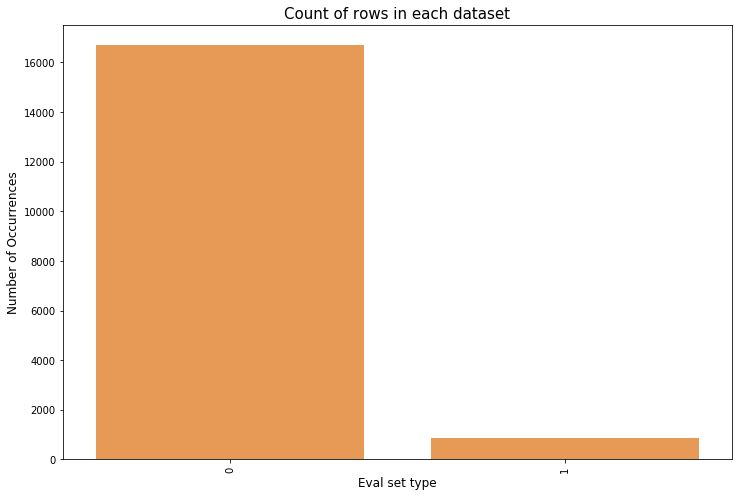

In [24]:
cnt_srs = fake_real_data.fraudulent.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [6]:
columns = list(fake_real_data.columns)
null_columns = dict()
type_null_columns = list()
for values in columns:
    null_values = fake_real_data[values].isnull().sum()
    if null_values > 0:
        null_columns[values] = null_values
        type_null_columns.append(type(fake_real_data[values][0]))
    print("Number of nan values in %s is %d"%(values,null_values))

Number of nan values in job_id is 0
Number of nan values in title is 0
Number of nan values in location is 346
Number of nan values in department is 11547
Number of nan values in salary_range is 15012
Number of nan values in company_profile is 3308
Number of nan values in description is 1
Number of nan values in requirements is 2695
Number of nan values in benefits is 7210
Number of nan values in telecommuting is 0
Number of nan values in has_company_logo is 0
Number of nan values in has_questions is 0
Number of nan values in employment_type is 3471
Number of nan values in required_experience is 7050
Number of nan values in required_education is 8105
Number of nan values in industry is 4903
Number of nan values in function is 6455
Number of nan values in fraudulent is 0


In [7]:
for values in columns:
    print("Number of unique values in %s is %d"%(values,fake_real_data[values].nunique()))

Number of unique values in job_id is 17880
Number of unique values in title is 11231
Number of unique values in location is 3105
Number of unique values in department is 1337
Number of unique values in salary_range is 874
Number of unique values in company_profile is 1709
Number of unique values in description is 14801
Number of unique values in requirements is 11968
Number of unique values in benefits is 6205
Number of unique values in telecommuting is 2
Number of unique values in has_company_logo is 2
Number of unique values in has_questions is 2
Number of unique values in employment_type is 5
Number of unique values in required_experience is 7
Number of unique values in required_education is 13
Number of unique values in industry is 131
Number of unique values in function is 37
Number of unique values in fraudulent is 2


In [8]:
print(null_columns)

{'location': 346, 'department': 11547, 'salary_range': 15012, 'company_profile': 3308, 'description': 1, 'requirements': 2695, 'benefits': 7210, 'employment_type': 3471, 'required_experience': 7050, 'required_education': 8105, 'industry': 4903, 'function': 6455}


In [9]:
print(type_null_columns)

[<class 'str'>, <class 'str'>, <class 'float'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'float'>, <class 'str'>, <class 'str'>, <class 'float'>, <class 'float'>, <class 'str'>]


In [10]:
length_of_dataset = len(fake_real_data)
drop_list = list()
for key,value in null_columns.items():
    if value > int(length_of_dataset * 10 /100):
        print(key,":",value)
        drop_list.append(key)

department : 11547
salary_range : 15012
company_profile : 3308
requirements : 2695
benefits : 7210
employment_type : 3471
required_experience : 7050
required_education : 8105
industry : 4903
function : 6455


In [11]:
for values in drop_list:
    fake_real_data = fake_real_data.drop(values,axis = 1)

In [12]:
fake_real_data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,Marketing Intern,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [13]:
null_list = list(null_columns.keys())
remaining_list = [item for item in null_list if item not in drop_list]
print(remaining_list)

['location', 'description']


In [14]:
fake_real_data = fake_real_data.dropna()

In [15]:
fake_real_data.isna().sum()

job_id              0
title               0
location            0
description         0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [16]:
mapping = {k: v for v, k in enumerate(fake_real_data.title.unique())}
fake_real_data['title'] = fake_real_data.title.map(mapping)
fake_real_data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,1,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,2,"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,0
3,4,3,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,4,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [17]:
mapping = {k: v for v, k in enumerate(fake_real_data.location.unique())}
fake_real_data['location'] = fake_real_data.location.map(mapping)
fake_real_data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,0,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,1,1,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,2,2,"Our client, located in Houston, is actively se...",0,1,0,0
3,4,3,3,THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,4,4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [18]:
fake_real_data = fake_real_data.drop('description',axis = 1)

In [19]:
fake_real_data.head()

,job_id,title,location,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,0,0,1,0,0
1,2,1,1,0,1,0,0
2,3,2,2,0,1,0,0
3,4,3,3,0,1,0,0
4,5,4,4,0,1,1,0


In [20]:
cor = fake_real_data.corr()
cor


,job_id,title,location,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,0.612436,0.184705,-0.004909,-0.013640,-0.088178,0.078685
title,0.612436,1.000000,0.113033,-0.006381,0.021109,-0.031114,0.051691
location,0.184705,0.113033,1.000000,-0.013424,-0.054875,-0.013587,0.080556
telecommuting,-0.004909,-0.006381,-0.013424,1.000000,-0.019339,0.020481,0.035609
has_company_logo,-0.013640,0.021109,-0.054875,-0.019339,1.000000,0.233162,-0.258901
has_questions,-0.088178,-0.031114,-0.013587,0.020481,0.233162,1.000000,-0.088870
fraudulent,0.078685,0.051691,0.080556,0.035609,-0.258901,-0.088870,1.000000


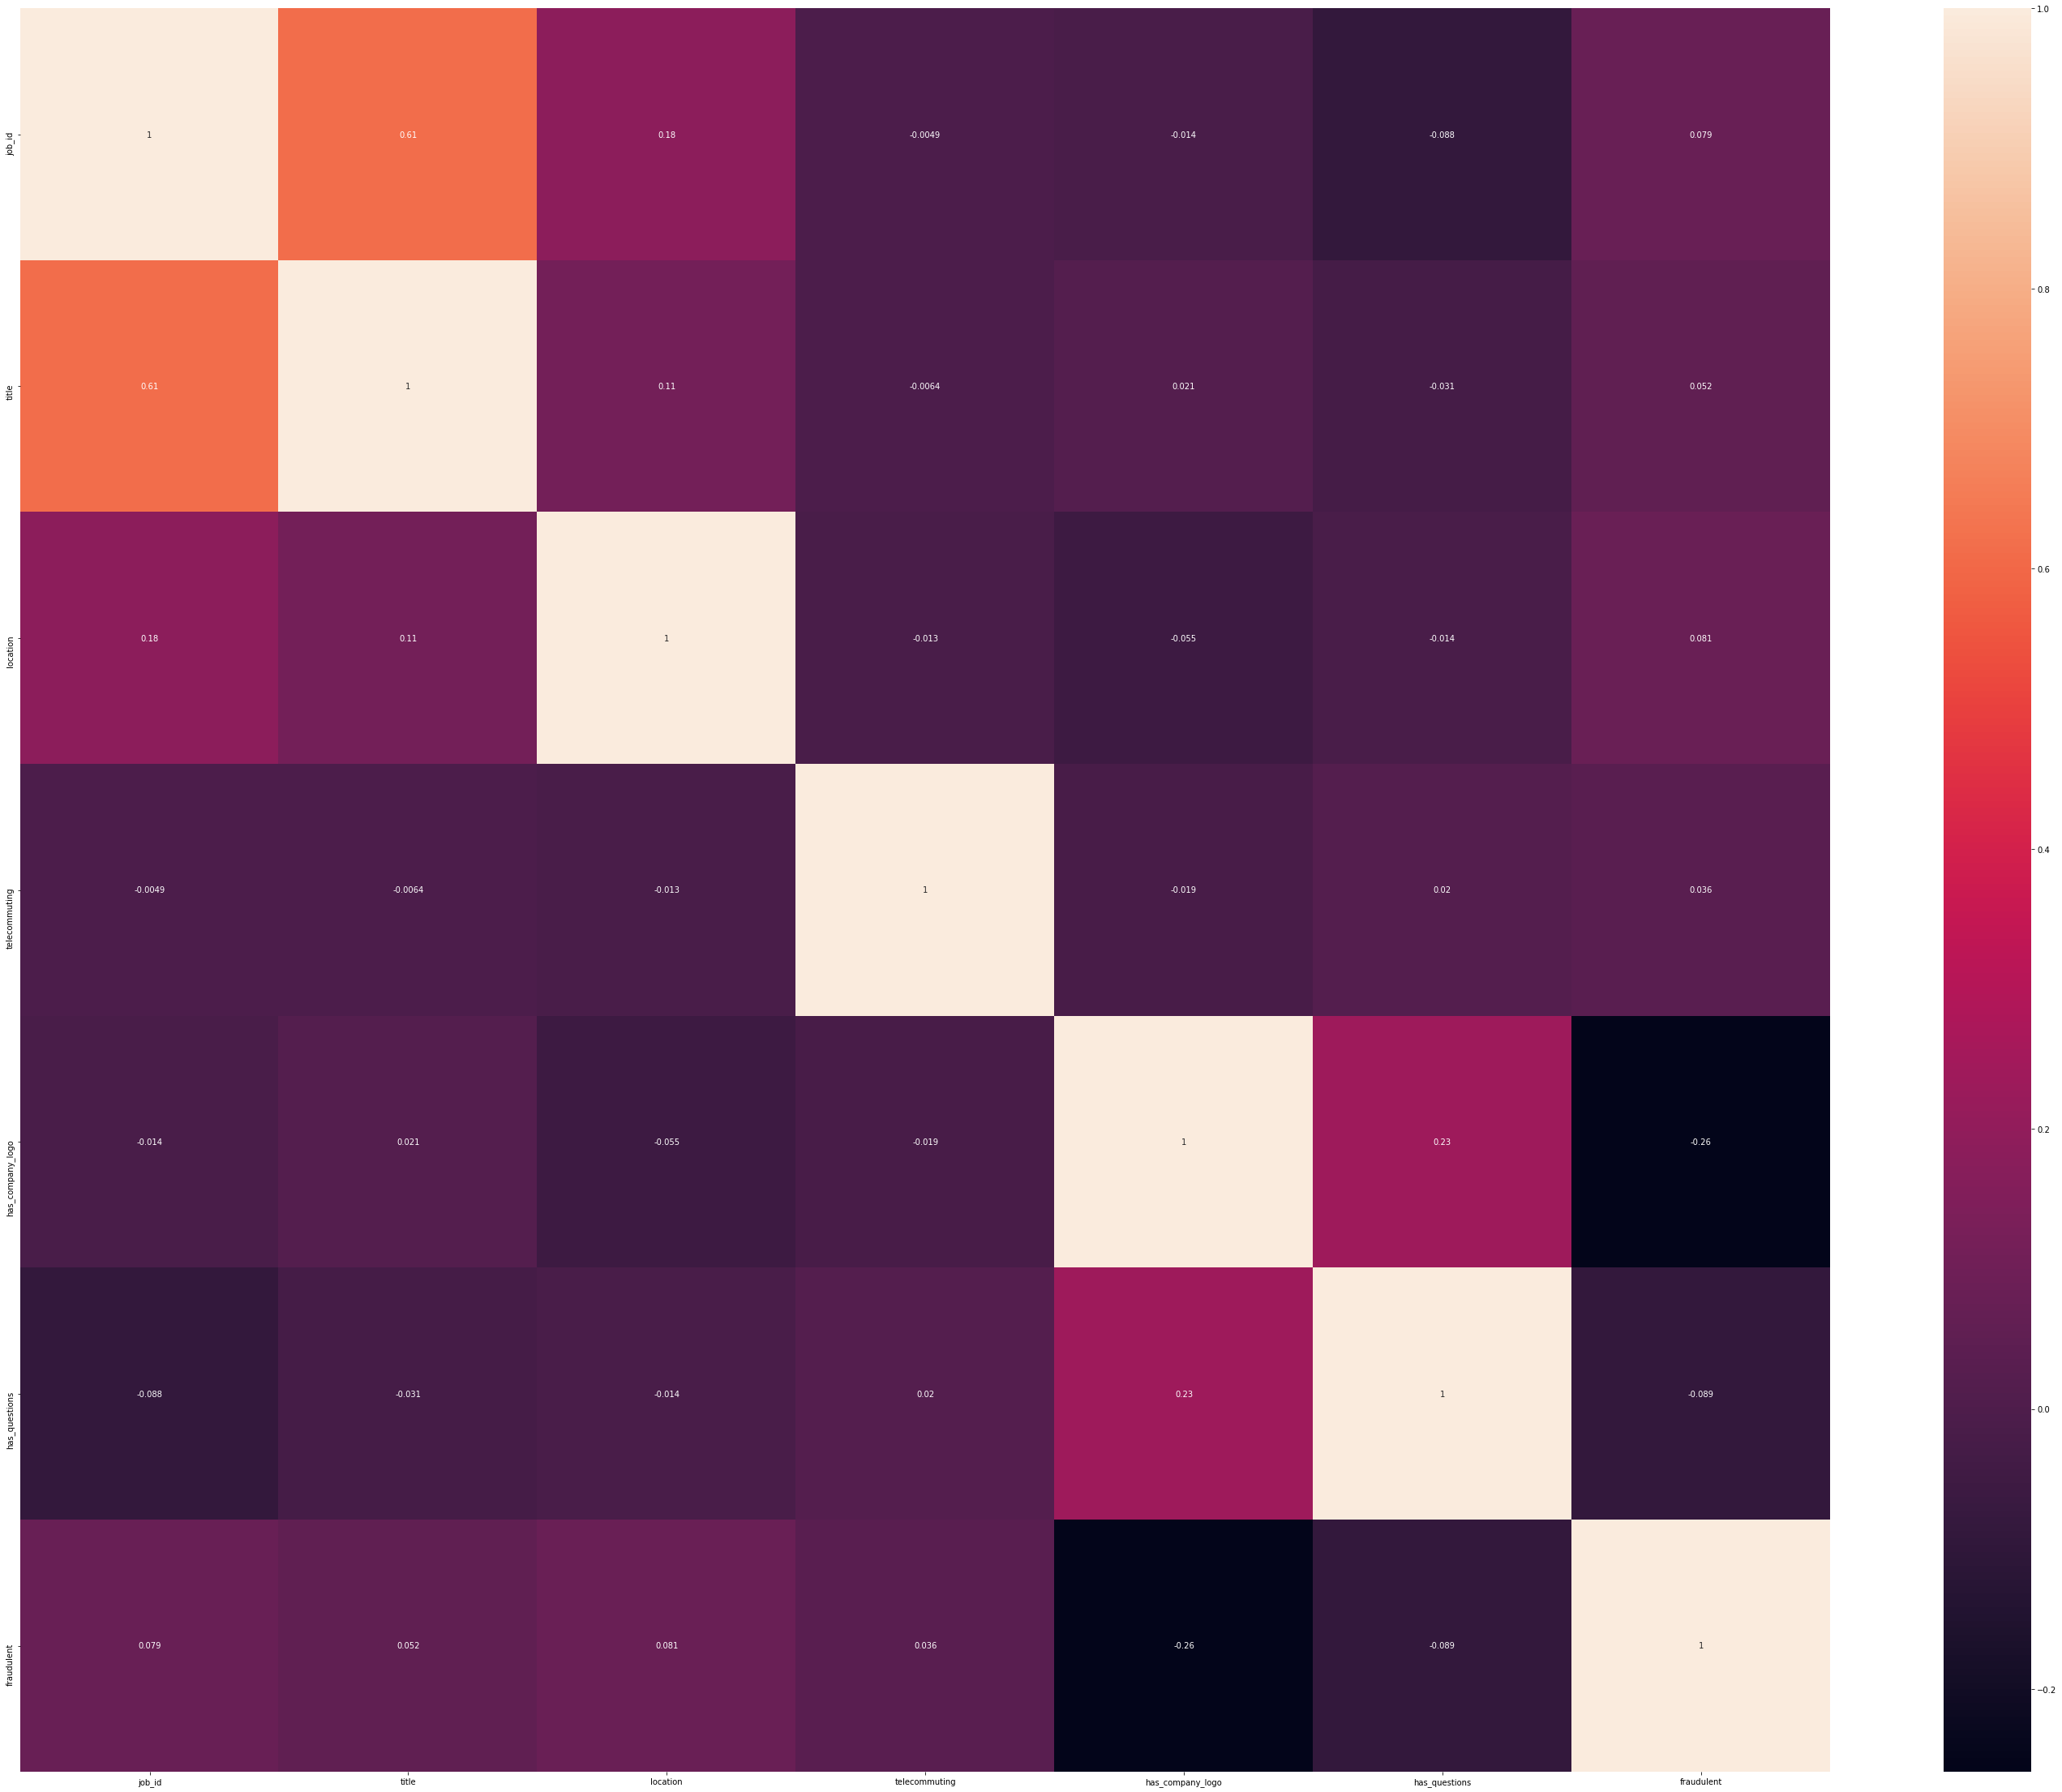

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,40))
sns.heatmap(cor,annot=True)

In [22]:
from scipy import stats
pichi_dict = {}
degree_of_freedom = {}
p_test_value = {}
expected_values = {}
column = fake_real_data.columns
names = list()
for i in range(len(column)):
    names.append(i)
data = pd.DataFrame(index=names,columns=names)
column_length = len(column)
type_dict = dict()
for i in range(column_length):
    for j in range(column_length):
        crosstab = pd.crosstab(fake_real_data[column[i]],fake_real_data[column[j]])
        g,p,dof,arr = stats.chi2_contingency(crosstab)
        pichi_dict[str(column[i])+" : "+str(column[j])] = g
        degree_of_freedom[str(column[i])+ " : " +str(column[j])] = dof
        data[i][j] = np.float64(p)
        if type(p) not in type_dict:
            type_dict[type(p)] = 1
        p_test_value[str(column[i])+ " : " + str(column[j])] = p
        expected_values[str(column[i])+str(column[j])] = arr
data.head()


,0,1,2,3,4,5,6
0,0.239746,0.28795,0.383009,0.496449,0.496449,0.496449,0.496449
1,0.28795,0,0,1.03666e-36,5.65946e-102,1.58792e-81,6.10648e-182
2,0.383009,0,0,1.28843e-30,0,5.02219e-249,0
3,0.496449,1.03666e-36,1.28843e-30,0,0.0119227,0.00748494,3.6971e-06
4,0.496449,5.65946e-102,0,0.0119227,0,4.82085e-209,6.58238e-257


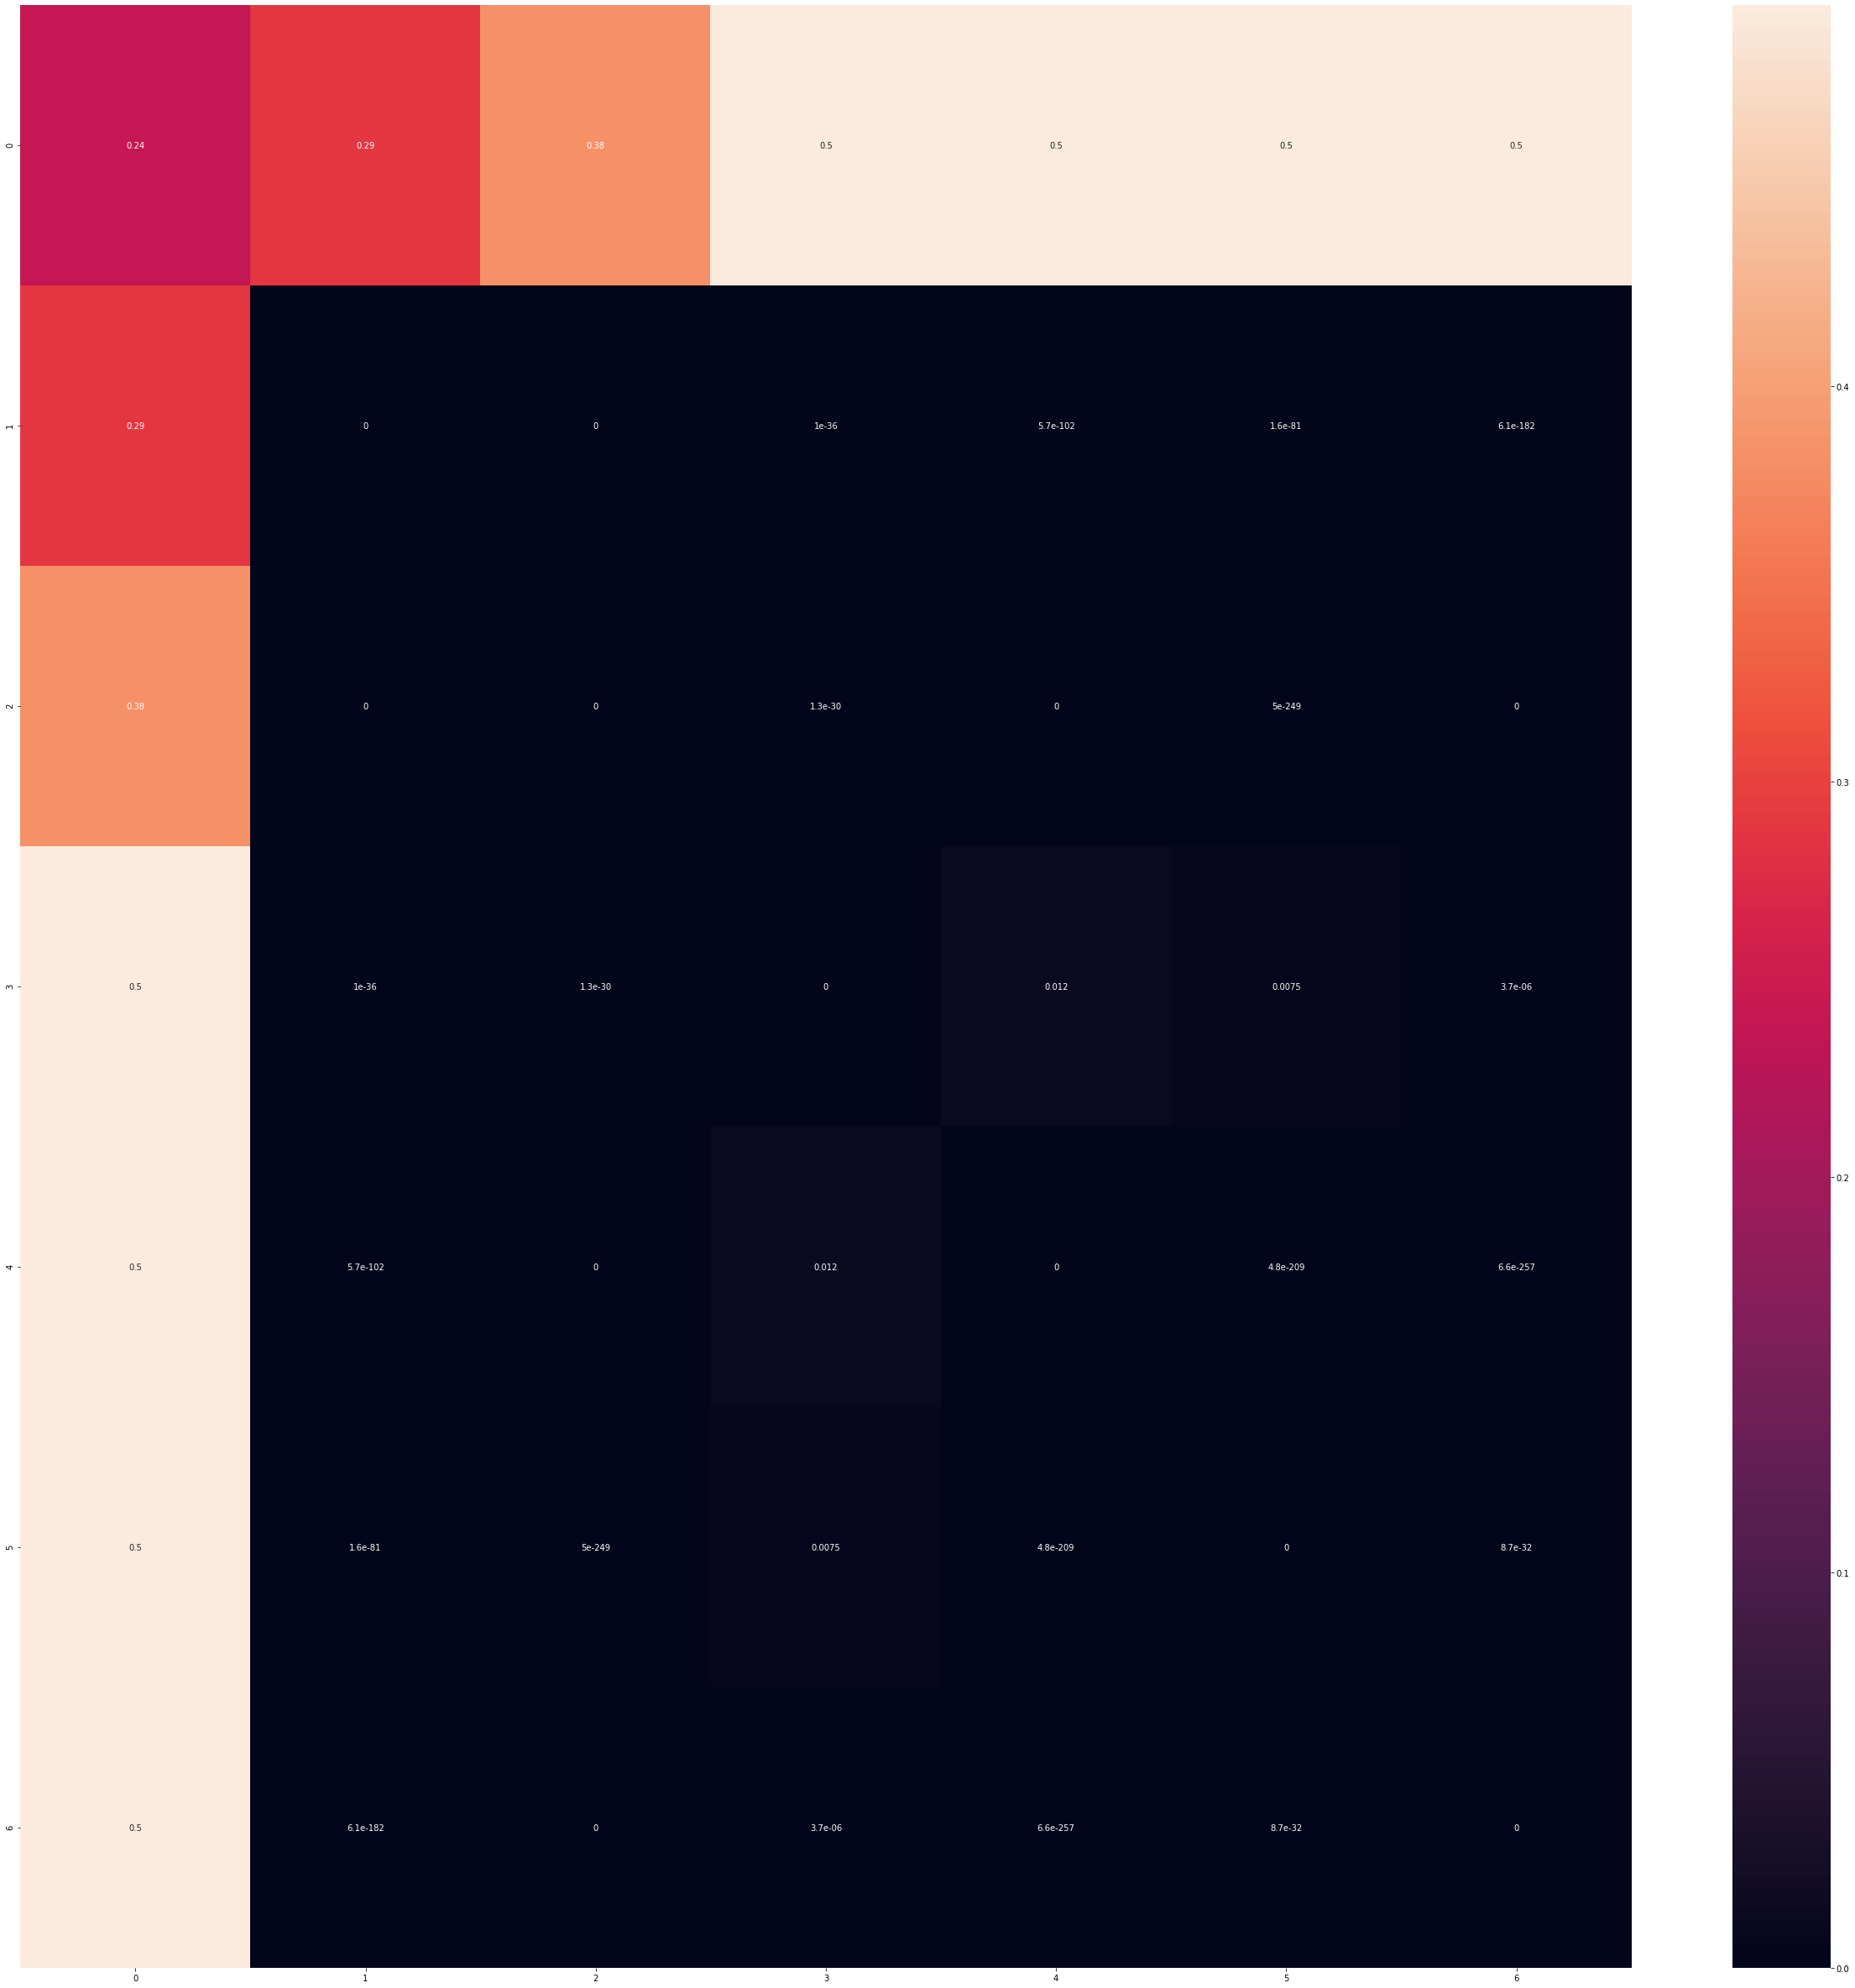

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(43,43))
data = data[data.columns].astype(float)
data.head()
sns.heatmap(data, annot = True)